In [1574]:
import pandas as pd
import numpy as np
import seaborn as sns



In [1575]:
### Ataques de tubarões matam mais surfistas?

In [1576]:
SA1 = pd.read_csv('attacks.csv', sep=',', encoding='latin1')

<AxesSubplot:>

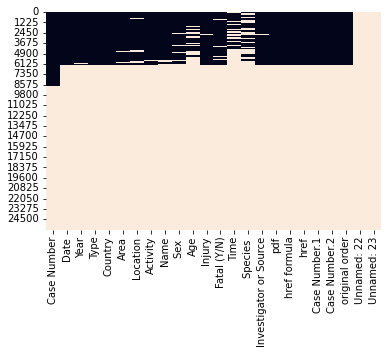

In [1577]:
sns.heatmap(SA1.isnull(), cbar=False)


<AxesSubplot:>

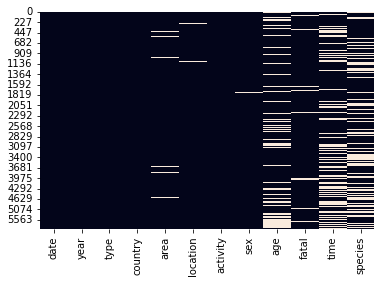

In [1578]:
sns.heatmap(SA2.isnull(), cbar=False)


In [1579]:
SA1 = SA1.drop(columns=['Case Number','Unnamed: 22', 'Unnamed: 23','href', 'href formula', 'original order', 'pdf', 'Investigator or Source', 'Injury', 'Name','Case Number.1','Case Number.2'])

In [1580]:
SA2 = SA1.dropna(thresh=10)

In [1581]:
SA2 = SA2.rename(columns={'Fatal (Y/N)':'Fatal'})

In [1582]:
SA2.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Sex ', 'Age', 'Fatal', 'Time', 'Species '],
      dtype='object')

In [1583]:
SA2.columns = [x.strip().lower().replace(' ','_') for x in SA2.columns]

In [1584]:
SA2.shape

(4162, 12)

In [1585]:
### Limpa a coluna Fatal.

SA3 = SA2.replace(to_replace={'fatal': {'N ':'N', 'UNKNOWN':'N', 'M':'N', 'y': 'Y', ' N':'N', '2017':'N', 'NaN': 'N', 'surfing':'N'}},value=None)


In [1634]:
SA3.fatal.value_counts()

N    3219
Y     674
Name: fatal, dtype: int64

In [1635]:
SA3.fatal.unique()

array(['N', 'Y', nan], dtype=object)

In [1587]:
SA3.dropna('Axis' == 0, how='all', subset=['activity'], inplace=True)

C:\Users\Rafael\AppData\Local\Temp/ipykernel_16144/2357462518.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  SA3.dropna('Axis' == 0, how='all', subset=['activity'], inplace=True)


In [1589]:
SA3.reset_index(drop=True, inplace=True)

In [1590]:
SA3['activity'] = SA3['activity'].astype(str)

In [1591]:
def tratar_string(activity):
    activity = activity.lower()
    activity = activity.strip()
    return activity

In [1592]:
SA3['activity'] = SA3['activity'].map(tratar_string)


In [1593]:
SA3.drop([2118, 3886, 3902],axis=0,inplace=True)

In [1594]:
SA3.loc[SA3['activity'].str.contains('surf'), 'activity_group'] = 'surfing'
SA3.loc[SA3['activity'].str.contains('body boarding'), 'activity_group'] = 'surfing'
SA3.loc[SA3['activity'].str.contains('Boogie boarding'), 'activity_group'] = 'surfing'
SA3.loc[SA3['activity'].str.contains('boogie boarding'), 'activity_group'] = 'surfing'
SA3.loc[SA3['activity'].str.contains('stand-up paddleboarding'), 'activity_group'] = 'surfing'
SA3.loc[SA3['activity'].str.contains('kite boarding'), 'activity_group'] = 'surfing'
SA3.loc[SA3['activity'].str.contains('paddle boarding'), 'activity_group'] = 'surfing'
SA3.loc[SA3['activity'].str.contains('paddling'), 'activity_group'] = 'surfing'
SA3.loc[SA3['activity'].str.contains('body-boarding'), 'activity_group'] = 'surfing'
SA3.loc[SA3['activity'].str.contains('paddle-skiing'), 'activity_group'] = 'surfing'
SA3.loc[SA3['activity'].str.contains('skimboarding'), 'activity_group'] = 'surfing'
SA3.loc[SA3['activity'].str.contains('sup'), 'activity_group'] = 'surfing'
SA3.loc[SA3['activity'].str.contains('bodyboarding'), 'activity_group'] = 'surfing'
SA3.loc[SA3['activity'].str.contains('wakeboarding'), 'activity_group'] = 'surfing'
SA3.loc[SA3['activity'].str.contains('kite-boarding'), 'activity_group'] = 'surfing'
SA3.loc[SA3['activity'].str.contains('paddle skiing'), 'activity_group'] = 'surfing'
SA3.loc[SA3['activity'].str.contains('sailboarding'), 'activity_group'] = 'surfing'
SA3.loc[SA3['activity'].str.contains('paddle-boarding'), 'activity_group'] = 'surfing'
SA3.loc[SA3['activity'].str.contains('board'), 'activity_group'] = 'surfing'
SA3.loc[SA3['activity'].str.contains('water-skiing'), 'activity_group'] = 'surfing'
SA3.loc[SA3['activity'].str.contains('kiteboarding'), 'activity_group'] = 'surfing'



SA3.loc[SA3['activity'].str.contains('dived for a coin'), 'activity_group'] = 'diving'
SA3.loc[SA3['activity'].str.contains('diving'), 'activity_group'] = 'diving'
SA3.loc[SA3['activity'].str.contains('Free diving'), 'activity_group'] = 'diving'
SA3.loc[SA3['activity'].str.contains('scuba'), 'activity_group'] = 'diving'
SA3.loc[SA3['activity'].str.contains('snorkeling'), 'activity_group'] = 'diving'
SA3.loc[SA3['activity'].str.contains('dived'), 'activity_group'] = 'diving'



SA3.loc[SA3['activity'].str.contains('fishing'), 'activity_group'] = 'fishing'
SA3.loc[SA3['activity'].str.contains('spearing fish'), 'activity_group'] = 'fishing'
SA3.loc[SA3['activity'].str.contains('feeding fish'), 'activity_group'] = 'fishing'
SA3.loc[SA3['activity'].str.contains('crabbing'), 'activity_group'] = 'fishing'
SA3.loc[SA3['activity'].str.contains('cleaning fish'), 'activity_group'] = 'fishing'
SA3.loc[SA3['activity'].str.contains('fish'), 'activity_group'] = 'fishing'
SA3.loc[SA3['activity'].str.contains('catching'), 'activity_group'] = 'fishing'
SA3.loc[SA3['activity'].str.contains('lobstering'), 'activity_group'] = 'fishing'
SA3.loc[SA3['activity'].str.contains('casting a net'), 'activity_group'] = 'fishing'
SA3.loc[SA3['activity'].str.contains('shrimping'), 'activity_group'] = 'fishing'
SA3.loc[SA3['activity'].str.contains('attempting to catch a crocodile'), 'activity_group'] = 'fishing'
SA3.loc[SA3['activity'].str.contains('prawn'), 'activity_group'] = 'fishing'
SA3.loc[SA3['activity'].str.contains('collecting marine specimens'), 'activity_group'] = 'fishing'
SA3.loc[SA3['activity'].str.contains('hunting turtle'), 'activity_group'] = 'fishing'
SA3.loc[SA3['activity'].str.contains('hunting lobsters in 2.4 m of water'), 'activity_group'] = 'fishing'
SA3.loc[SA3['activity'].str.contains('seine netting'), 'activity_group'] = 'fishing'


SA3.loc[SA3['activity'].str.contains('wading'), 'activity_group'] = 'swimming'
SA3.loc[SA3['activity'].str.contains('swimming'), 'activity_group'] = 'swimming'
SA3.loc[SA3['activity'].str.contains('bathing'), 'activity_group'] = 'swimming'
SA3.loc[SA3['activity'].str.contains('standing'), 'activity_group'] = 'swimming'
SA3.loc[SA3['activity'].str.contains('floating'), 'activity_group'] = 'swimming'
SA3.loc[SA3['activity'].str.contains('knocked overboard'), 'activity_group'] = 'swimming'
SA3.loc[SA3['activity'].str.contains('treading water'), 'activity_group'] = 'swimming'
SA3.loc[SA3['activity'].str.contains('jumping'), 'activity_group'] = 'swimming'
SA3.loc[SA3['activity'].str.contains('jumped into the water'), 'activity_group'] = 'swimming'
SA3.loc[SA3['activity'].str.contains('jumped overboard'), 'activity_group'] = 'swimming'
SA3.loc[SA3['activity'].str.contains('playing in the water'), 'activity_group'] = 'swimming'
SA3.loc[SA3['activity'].str.contains('playing'), 'activity_group'] = 'swimming'
SA3.loc[SA3['activity'].str.contains('washing hands'), 'activity_group'] = 'swimming'
SA3.loc[SA3['activity'].str.contains('rescuing'), 'activity_group'] = 'swimming'
SA3.loc[SA3['activity'].str.contains('crawling'), 'activity_group'] = 'swimming'
SA3.loc[SA3['activity'].str.contains('crouching'), 'activity_group'] = 'swimming'
SA3.loc[SA3['activity'].str.contains('jumped'), 'activity_group'] = 'swimming'
SA3.loc[SA3['activity'].str.contains('crossing the river'), 'activity_group'] = 'swimming'
SA3.loc[SA3['activity'].str.contains('float'), 'activity_group'] = 'swimming'
SA3.loc[SA3['activity'].str.contains('attempting to swim across the atlantic ocean'), 'activity_group'] = 'swimming'
SA3.loc[SA3['activity'].str.contains('attempting to set underwater endurance record'), 'activity_group'] = 'swimming'



SA3.loc[SA3['activity'].str.contains('canoeing'), 'activity_group'] = 'kayaking'
SA3.loc[SA3['activity'].str.contains('kayaking'), 'activity_group'] = 'kayaking'
SA3.loc[SA3['activity'].str.contains('sculling'), 'activity_group'] = 'kayaking'
SA3.loc[SA3['activity'].str.contains('rowing'), 'activity_group'] = 'kayaking'
SA3.loc[SA3['activity'].str.contains('boating'), 'activity_group'] = 'kayaking'
SA3.loc[SA3['activity'].str.contains('boat'), 'activity_group'] = 'kayaking'
SA3.loc[SA3['activity'].str.contains('paddleskiing'), 'activity_group'] = 'kayaking'
SA3.loc[SA3['activity'].str.contains('sailing'), 'activity_group'] = 'kayaking'
SA3.loc[SA3['activity'].str.contains('kakaying'), 'activity_group'] = 'kayaking'




SA3.loc[SA3['activity'].str.contains('dangling feet in the water'), 'activity_group'] = 'walking'
SA3.loc[SA3['activity'].str.contains('walking'), 'activity_group'] = 'walking'
SA3.loc[SA3['activity'].str.contains('fell overboard'), 'activity_group'] = 'walking'
SA3.loc[SA3['activity'].str.contains('collecting shells'), 'activity_group'] = 'walking'
SA3.loc[SA3['activity'].str.contains('washing his feet'), 'activity_group'] = 'walking'
SA3.loc[SA3['activity'].str.contains('hiking on the beach'), 'activity_group'] = 'walking'


SA3.loc[SA3['activity'].str.contains('splashing'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('fell into the water'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('clamming'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('lifesaving drill'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('unknown'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('escaping from alacatraz'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('suicide'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('sitting in shallows'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('murder'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('sitting in the water'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('jet skiing'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('fell from the jetty'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('washing'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('filming'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('feeding stingrays?'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('kneeling in the water'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('attempting to fix motor'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('collecting beche-de-me'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('batin'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('conducting'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('lying'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('sitting'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('pêcheur de bichiques'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('nsb meshing'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('racing ski'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('steinhart aquarium'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('exercising his dog in the shallows'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('leaving the water'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('searching for remains'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('adrift after the sinking'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('rolled off raft'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('cleaning a tank'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('collecting aquarium specimens'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('pulling raft out to ride to shore'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('testing classified underwater'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('pulling anchor'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('dragging banana seeds through the shallows'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('gigging for flounder'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('crossing the bay at the ford'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('bending over'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('underwater photography'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('disappeared 11 days earlier, probable homicide.'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('retrieving meat from a cage in the water'), 'activity_group'] = 'Others'
SA3.loc[SA3['activity'].str.contains('his balloon crashed in the harbor'), 'activity_group'] = 'Others'


SA3.loc[SA3['activity'].str.contains('their 9 m launch was run down by a 25,000-ton japanese freighter  on the night of 3-11-1977 & they drifted, clinging to an icebox for 2 days'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('u.s. airforce c124 enroute from hickham air base to japan went down. the 3 survivors fashioned raft from mailbags  & were rescued 3 days after the crash.'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('air disaster'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('hmas parramatta torpedoed & sunk by the u-559'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('flying tiger'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('aircraft'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('wreck'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('ship'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('air force'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('submarine'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('the christie'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('cruising'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('yachting accident'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('fell from his fathers back into the water'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('thrown overboard'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('fell oveboard from steamer wanderer'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('swept out to sea'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('attempting to illegally enter the usa'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('adrift in a life jacket'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('towing rubber dinghy'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('adrift on refugee raft'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('adrift after ditching plane in the sea'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('canoe capsized'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('sinking of the dredge world atlas'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('adrift after wave swamped engine'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('adrift, hanging onto cushion, after'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('reaching for life preserver'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('body found on deserted luxury'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('swept off deck'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('lifesaving exhibition'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('survived crash'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('fell from wharf into water & attacked immediately'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('inebriated, woke from sleep and fell off deck'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('fell from his father'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('knocked into the water'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('cutter capsized'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('taking wife to beach & about 1 m from the shore'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('3-masted steel barque glenbank foundered durin'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('reported swept away by waves while gathering o'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('sea disaster'), 'activity_group'] = 'Accident'
SA3.loc[SA3['activity'].str.contains('shipwreck'), 'activity_group'] = 'Accident'




SA3.loc[SA3['activity'].str.contains('tagging sharks'), 'activity_group'] = 'Activity Sharks'
SA3.loc[SA3['activity'].str.contains('feeding sharks'), 'activity_group'] = 'Activity Sharks'
SA3.loc[SA3['activity'].str.contains('shark tagging'), 'activity_group'] = 'Activity Sharks'
SA3.loc[SA3['activity'].str.contains('teasing a shark'), 'activity_group'] = 'Activity Sharks'
SA3.loc[SA3['activity'].str.contains('shark watching'), 'activity_group'] = 'Activity Sharks'
SA3.loc[SA3['activity'].str.contains('shooting sharks'), 'activity_group'] = 'Activity Sharks'
SA3.loc[SA3['activity'].str.contains('attempting to kill a shark with explosives'), 'activity_group'] = 'Activity Sharks'
SA3.loc[SA3['activity'].str.contains('shark'), 'activity_group'] = 'activity Sharks'



In [1660]:
DF_QtdAtacks = SA3.activity_group.value_counts()
DF_QtdAtacks

swimming           1271
surfing            1188
fishing             718
diving              398
activity Sharks     157
kayaking            129
Others              126
Accident             74
walking              40
Name: activity_group, dtype: int64

In [1656]:
DF_Atacks_Prop = round(SA3.activity_group.value_counts(normalize=True).sort_values(ascending=False)*100,2)
DF_Atacks_Prop

swimming           30.99
surfing            28.97
fishing            17.51
diving              9.70
activity Sharks     3.83
kayaking            3.15
Others              3.07
Accident            1.80
walking             0.98
Name: activity_group, dtype: float64

In [1666]:
Query_Fatal = SA3.query("fatal == 'Y'")

DF_Qtd_Fatal = Query_Fatal.activity_group.value_counts()

DF_Qtd_Fatal

swimming           336
surfing             83
diving              79
fishing             71
Accident            45
Others              22
kayaking            19
activity Sharks     11
walking              8
Name: activity_group, dtype: int64

In [1800]:
DF_Fatal_Prop = round(Query_Fatal.activity_group.value_counts(normalize=True).sort_values(ascending=False)*100,2)

DF_Fatal_Prop

swimming           49.85
surfing            12.31
diving             11.72
fishing            10.53
Accident            6.68
Others              3.26
kayaking            2.82
activity Sharks     1.63
walking             1.19
Name: activity_group, dtype: float64

In [1670]:
Query_Não_Fatal = SA3.query("fatal == 'N'")

DF_Qtd_Não_Fatal = Query_Não_Fatal.activity_group.value_counts()

DF_Qtd_Não_Fatal

surfing            1068
swimming            856
fishing             611
diving              293
activity Sharks     144
kayaking            100
Others               97
walking              27
Accident             22
Name: activity_group, dtype: int64

In [1801]:
DF_SharkAtack = pd.DataFrame(DF_QtdAtacks)

DF_SharkAtack[1]=pd.Series(DF_Atacks_Prop)

DF_SharkAtack[2]=pd.Series(DF_Qtd_Fatal)

DF_SharkAtack[3]=pd.Series(DF_Qtd_Não_Fatal)

DF_SharkAtack[4]=pd.Series(DF_Fatal_Prop)

DF_SharkAtack

,activity_group,1,2,3,4
swimming,1271,30.99,336,856,49.85
surfing,1188,28.97,83,1068,12.31
fishing,718,17.51,71,611,10.53
diving,398,9.70,79,293,11.72
activity Sharks,157,3.83,11,144,1.63
kayaking,129,3.15,19,100,2.82
Others,126,3.07,22,97,3.26
Accident,74,1.80,45,22,6.68
walking,40,0.98,8,27,1.19


In [1802]:
DF_SharkAtack.reset_index(inplace=True)
DF_SharkAtack

,index,activity_group,1,2,3,4
0,swimming,1271,30.99,336,856,49.85
1,surfing,1188,28.97,83,1068,12.31
2,fishing,718,17.51,71,611,10.53
3,diving,398,9.70,79,293,11.72
4,activity Sharks,157,3.83,11,144,1.63
5,kayaking,129,3.15,19,100,2.82
6,Others,126,3.07,22,97,3.26
7,Accident,74,1.80,45,22,6.68
8,walking,40,0.98,8,27,1.19


In [1804]:
DF_SharkAtack.rename(columns={'index':'Activity', 'activity_group':'QtdAtacks', 1:'Atacks_%Prop', 2:'Qtd_Fatal', 3:'Qtd_Nao_Fatal', 4:'Fatal_%Prop'},inplace=True)
DF_SharkAtack

,Activity,QtdAtacks,Atacks_%Prop,Qtd_Fatal,Qtd_Nao_Fatal,Fatal_%Prop
0,swimming,1271,30.99,336,856,49.85
1,surfing,1188,28.97,83,1068,12.31
2,fishing,718,17.51,71,611,10.53
3,diving,398,9.70,79,293,11.72
4,activity Sharks,157,3.83,11,144,1.63
5,kayaking,129,3.15,19,100,2.82
6,Others,126,3.07,22,97,3.26
7,Accident,74,1.80,45,22,6.68
8,walking,40,0.98,8,27,1.19


In [1805]:
DF_SharkAtack['%_Qtd_Fatal'] = round(DF_SharkAtack['Qtd_Fatal']/DF_SharkAtack['QtdAtacks']*100,2)


In [1806]:
DF_SharkAtack['%_Qtd_Nao_Fatal'] = round(DF_SharkAtack['Qtd_Nao_Fatal']/DF_SharkAtack['QtdAtacks']*100,2)


In [1807]:
DF_SharkAtack

,Activity,QtdAtacks,Atacks_%Prop,Qtd_Fatal,Qtd_Nao_Fatal,Fatal_%Prop,%_Qtd_Fatal,%_Qtd_Nao_Fatal
0,swimming,1271,30.99,336,856,49.85,26.44,67.35
1,surfing,1188,28.97,83,1068,12.31,6.99,89.90
2,fishing,718,17.51,71,611,10.53,9.89,85.10
3,diving,398,9.70,79,293,11.72,19.85,73.62
4,activity Sharks,157,3.83,11,144,1.63,7.01,91.72
5,kayaking,129,3.15,19,100,2.82,14.73,77.52
6,Others,126,3.07,22,97,3.26,17.46,76.98
7,Accident,74,1.80,45,22,6.68,60.81,29.73
8,walking,40,0.98,8,27,1.19,20.00,67.50


In [1809]:
DF_SharkAtack[['Activity','QtdAtacks','Atacks_%Prop','Qtd_Fatal','%_Qtd_Fatal','Fatal_%Prop','Qtd_Nao_Fatal','%_Qtd_Nao_Fatal']].sort_values('Fatal_%Prop', ascending=False)

,Activity,QtdAtacks,Atacks_%Prop,Qtd_Fatal,%_Qtd_Fatal,Fatal_%Prop,Qtd_Nao_Fatal,%_Qtd_Nao_Fatal
0,swimming,1271,30.99,336,26.44,49.85,856,67.35
1,surfing,1188,28.97,83,6.99,12.31,1068,89.90
3,diving,398,9.70,79,19.85,11.72,293,73.62
2,fishing,718,17.51,71,9.89,10.53,611,85.10
7,Accident,74,1.80,45,60.81,6.68,22,29.73
6,Others,126,3.07,22,17.46,3.26,97,76.98
5,kayaking,129,3.15,19,14.73,2.82,100,77.52
4,activity Sharks,157,3.83,11,7.01,1.63,144,91.72
8,walking,40,0.98,8,20.00,1.19,27,67.50
